In [1]:
import nltk
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import PIL.Image as image

from numpy import mean,median,ptp,var,std
from scipy.stats import mode

from datetime import datetime

In [2]:
path = ''
dataset = pd.read_csv('user_info_2292.csv', header=0, index_col=0)

In [3]:
datetime.now()

datetime.datetime(2019, 12, 19, 19, 11, 29, 141325)

In [4]:
dataset['time']=dataset['created_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
dataset['delta']=datetime.now()-dataset['time']

In [5]:
dataset['delta']

1       594 days 01:06:15.192503
2       469 days 01:02:55.192503
3       133 days 15:31:46.192503
4       824 days 07:24:54.192503
8      4638 days 20:01:58.192503
                  ...           
3959    170 days 07:30:31.192503
3960   3900 days 00:02:08.192503
3962    713 days 18:12:56.192503
3964   2795 days 05:55:43.192503
3965   3953 days 16:39:05.192503
Name: delta, Length: 2292, dtype: timedelta64[ns]

In [6]:
dataset['float']=dataset['delta'].apply(lambda x:x/np.timedelta64(1,'D'))

In [7]:
dataset

,id,name,location,followers_count,following_count,favourites_count,statuses_count,listed_count,created_at,time,delta,float
1,992465186362724352,warrior_mhs,"Frisco, TX",154,367,2304,224,0,2018-05-04 18:05:14,2018-05-04 18:05:14,594 days 01:06:15.192503,594.046009
2,1037764508025012225,BchsAll,"Florida, USA",94,325,72,365,0,2018-09-06 18:08:34,2018-09-06 18:08:34,469 days 01:02:55.192503,469.043694
3,1159308178875670528,HEADPOTUS,"Manhattan, NY",95,4264,2401,3923,0,2019-08-08 03:39:43,2019-08-08 03:39:43,133 days 15:31:46.192503,133.647062
4,909020687934816256,lacenlyn,United States,1503,3838,27006,18169,3,2017-09-16 11:46:35,2017-09-16 11:46:35,824 days 07:24:54.192503,824.308961
8,3742901,tropology,NaN,1692,4500,11764,9045,123,2007-04-07 23:09:31,2007-04-07 23:09:31,4638 days 20:01:58.192503,4638.834701
...,...,...,...,...,...,...,...,...,...,...,...,...
3959,1146020936837214208,helenpieper64,"Sudbury, East",571,3099,75,77,0,2019-07-02 11:40:58,2019-07-02 11:40:58,170 days 07:30:31.192503,170.312861
3960,31487148,gpacanins,"Miami, FL",1135,1278,706,3597,15,2009-04-15 19:09:21,2009-04-15 19:09:21,3900 days 00:02:08.192503,3900.001484
3962,949082659858284546,zackjunior18,"Johannesburg, South Africa",8,213,149,80,0,2018-01-05 00:58:33,2018-01-05 00:58:33,713 days 18:12:56.192503,713.758984
3964,562095735,Ahmed444Saeed,"PESHAWAR,KPK",251,2291,8093,1748,0,2012-04-24 13:15:46,2012-04-24 13:15:46,2795 days 05:55:43.192503,2795.247028


In [8]:
def descriptive_analysis(key):
    plt.boxplot(list(dataset[key]),labels=[key])
    plt.show()
    print('mean:',round(dataset[key].mean(),2))
    print('median:',round(dataset[key].median(),2))

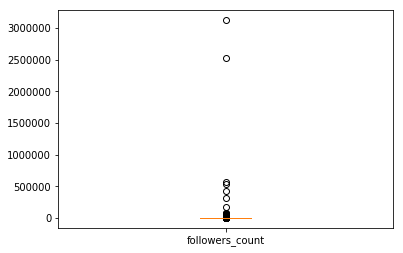

mean: 4178.38
median: 106.0


In [9]:
descriptive_analysis('followers_count')

In [10]:
dataset['followers_count'].describe()

count    2.292000e+03
mean     4.178375e+03
std      8.626001e+04
min      0.000000e+00
25%      3.300000e+01
50%      1.060000e+02
75%      3.450000e+02
max      3.121818e+06
Name: followers_count, dtype: float64

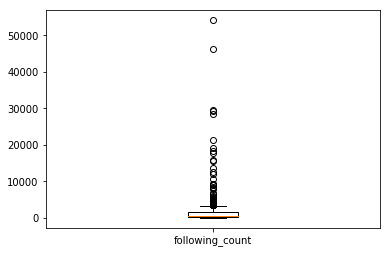

mean: 1248.38
median: 607.0


In [11]:
descriptive_analysis('following_count')

In [12]:
dataset['following_count'].describe()

count     2292.000000
mean      1248.384817
std       2389.719525
min          9.000000
25%        239.750000
50%        607.000000
75%       1520.250000
max      54093.000000
Name: following_count, dtype: float64

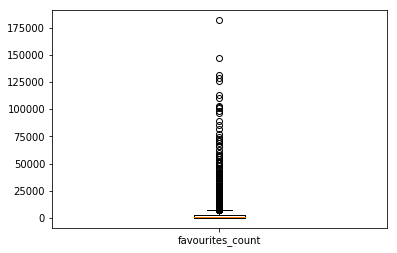

mean: 4272.19
median: 668.5


In [13]:
descriptive_analysis('favourites_count')

In [14]:
dataset['favourites_count'].describe()

count      2292.000000
mean       4272.193717
std       12262.000488
min           0.000000
25%         150.000000
50%         668.500000
75%        3009.000000
max      181674.000000
Name: favourites_count, dtype: float64

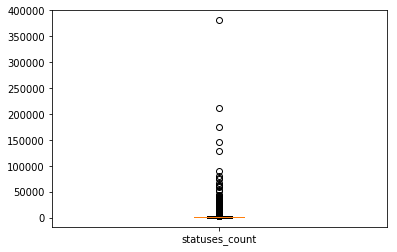

mean: 2812.34
median: 321.5


In [15]:
descriptive_analysis('statuses_count')

In [16]:
dataset['statuses_count'].describe()

count      2292.000000
mean       2812.337696
std       12497.915579
min          30.000000
25%          94.000000
50%         321.500000
75%        1551.750000
max      381864.000000
Name: statuses_count, dtype: float64

In [17]:
dataset['followers_count'].describe()

count    2.292000e+03
mean     4.178375e+03
std      8.626001e+04
min      0.000000e+00
25%      3.300000e+01
50%      1.060000e+02
75%      3.450000e+02
max      3.121818e+06
Name: followers_count, dtype: float64

In [18]:
dataset['float'].describe()

count    2292.000000
mean     1587.056520
std      1308.196263
min        33.458104
25%       340.730566
50%      1302.926304
75%      2726.367690
max      4883.819470
Name: float, dtype: float64

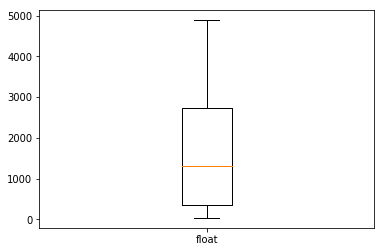

mean: 1587.06
median: 1302.93


In [19]:
descriptive_analysis('float')

In [20]:
a=dataset['statuses_count']

In [21]:
print(np.percentile(a, 45))

250.0


In [22]:
print(np.percentile(a, 58))

533.78


In [23]:
print(np.percentile(a, 25))

94.0


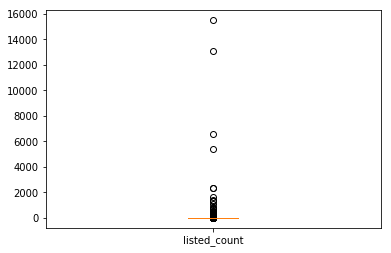

mean: 33.75
median: 0.0


In [24]:
descriptive_analysis('listed_count')

In [25]:
dataset1 = pd.read_csv('full_data.csv', header=0, index_col=0)

In [26]:
dataset1

,id,name,location,followers_count,following_count,favourites_count,statuses_count,listed_count,created_at,address,latitude,longitude,city,region,country,pred
0,992465186362724352,warrior_mhs,"Frisco, TX",154,367,2304,224,0,2018-05-04 18:05:14,"Frisco, TX, USA",33.150674,-96.823612,Frisco,Texas,United States,ENFP
1,1037764508025012225,BchsAll,"Florida, USA",94,325,72,365,0,2018-09-06 18:08:34,"Florida, USA",27.664827,-81.515754,Avon Park,Florida,United States,ISTJ
2,1159308178875670528,HEADPOTUS,"Manhattan, NY",95,4264,2401,3923,0,2019-08-08 03:39:43,"Manhattan, New York, NY, USA",40.783060,-73.971249,Manhattan,New York,United States,INTJ
3,909020687934816256,lacenlyn,United States,1503,3838,27006,18169,3,2017-09-16 11:46:35,United States,37.090240,-95.712891,NaN,NaN,United States,ENTP
4,3742901,tropology,NaN,1692,4500,11764,9045,123,2007-04-07 23:09:31,NaN,NaN,NaN,NaN,NaN,NaN,ENTJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1146020936837214208,helenpieper64,"Sudbury, East",571,3099,75,77,0,2019-07-02 11:40:58,"Greater Sudbury, ON, Canada",46.491732,-80.993029,Greater Sudbury,Ontario,Canada,ENTP
2288,31487148,gpacanins,"Miami, FL",1135,1278,706,3597,15,2009-04-15 19:09:21,"Miami, FL, USA",25.761680,-80.191790,Miami,Florida,United States,INFJ
2289,949082659858284546,zackjunior18,"Johannesburg, South Africa",8,213,149,80,0,2018-01-05 00:58:33,"Johannesburg, South Africa",-26.204103,28.047305,Johannesburg,Gauteng,South Africa,INFJ
2290,562095735,Ahmed444Saeed,"PESHAWAR,KPK",251,2291,8093,1748,0,2012-04-24 13:15:46,"Peshawar, Khyber Pakhtunkhwa, Pakistan",34.015137,71.524915,Peshawar,Khyber Pakhtunkhwa,Pakistan,ENTP


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

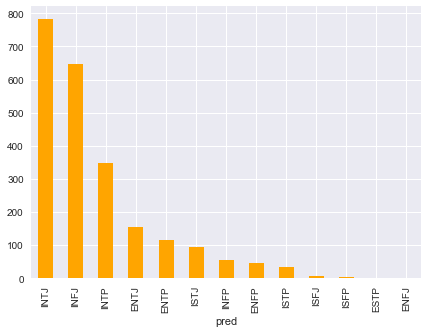

In [28]:
dataset_group = dataset1.groupby('pred')
dataset_group.size().sort_values(ascending=False).plot(kind='bar', color='orange',figsize=(7,5))